# Classification Modeling: Feed-Forward Neural Networks
### Author: Ehsan Gharib-Nezhad


In [28]:
# Load Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.probability import FreqDist
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import  LabelEncoder, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsOneClassifier
from sklearn.metrics import classification_report, confusion_matrix


import random


# statistics libraries / models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

from sklearn.datasets import make_classification





from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l1, l2, l1_l2
from tensorflow.keras.callbacks import EarlyStopping

# multi-class classification with Keras
import pandas
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
# from sklearn.pipeline import Pipeline

# |||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
# Dataset 1: Human dataset
# |||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||

In [29]:
# Load datasets
human = pd.read_csv('../outputs/human_kmer_dataset.csv')

In [30]:
human.head()

class                                               2mer  \
0      4  ['at', 'tg', 'gc', 'cc', 'cc', 'cc', 'ca', 'aa...   
1      4  ['at', 'tg', 'ga', 'aa', 'ac', 'cg', 'ga', 'aa...   
2      3  ['at', 'tg', 'gt', 'tg', 'gt', 'tg', 'gg', 'gc...   
3      3  ['at', 'tg', 'gt', 'tg', 'gt', 'tg', 'gg', 'gc...   
4      3  ['at', 'tg', 'gc', 'ca', 'aa', 'ac', 'ca', 'ag...   

                                                3mer  \
0  ['atg', 'tgc', 'gcc', 'ccc', 'ccc', 'cca', 'ca...   
1  ['atg', 'tga', 'gaa', 'aac', 'acg', 'cga', 'ga...   
2  ['atg', 'tgt', 'gtg', 'tgt', 'gtg', 'tgg', 'gg...   
3  ['atg', 'tgt', 'gtg', 'tgt', 'gtg', 'tgg', 'gg...   
4  ['atg', 'tgc', 'gca', 'caa', 'aac', 'aca', 'ca...   

                                                4mer  \
0  ['atgc', 'tgcc', 'gccc', 'cccc', 'ccca', 'ccaa...   
1  ['atga', 'tgaa', 'gaac', 'aacg', 'acga', 'cgaa...   
2  ['atgt', 'tgtg', 'gtgt', 'tgtg', 'gtgg', 'tggc...   
3  ['atgt', 'tgtg', 'gtgt', 'tgtg', 'gtgg', 'tggc...   
4  ['atgc', 'tgca', 'gcaa', 'caac', 'aaca', 'acag...   

                                                5mer  \
0  ['atgcc', 'tgccc', 'gcccc', 'cccca', 'cccaa', ...   
1  ['atgaa', 'tgaac', 'gaacg', 'aacga', 'acgaa', ...   
2  ['atgtg', 'tgtgt', 'gtgtg', 'tgtgg', 'gtggc', ...   
3  ['atgtg', 'tgtgt', 'gtgtg', 'tgtgg', 'gtggc', ...   
4  ['atgca', 'tgcaa', 'gcaac', 'caaca', 'aacag', ...   

                                                6mer  \
0  ['atgccc', 'tgcccc', 'gcccca', 'ccccaa', 'ccca...   
1  ['atgaac', 'tgaacg', 'gaacga', 'aacgaa', 'acga...   
2  ['atgtgt', 'tgtgtg', 'gtgtgg', 'tgtggc', 'gtgg...   
3  ['atgtgt', 'tgtgtg', 'gtgtgg', 'tgtggc', 'gtgg...   
4  ['atgcaa', 'tgcaac', 'gcaaca', 'caacag', 'aaca...   

                                                7mer  \
0  ['atgcccc', 'tgcccca', 'gccccaa', 'ccccaac', '...   
1  ['atgaacg', 'tgaacga', 'gaacgaa', 'aacgaaa', '...   
2  ['atgtgtg', 'tgtgtgg', 'gtgtggc', 'tgtggca', '...   
3  ['atgtgtg', 'tgtgtgg', 'gtgtggc', 'tgtggca', '...   
4  ['atgcaac', 'tgcaaca', 'gcaacag', 'caacagc', '...   

                                                8mer  \
0  ['atgcccca', 'tgccccaa', 'gccccaac', 'ccccaact...   
1  ['atgaacga', 'tgaacgaa', 'gaacgaaa', 'aacgaaaa...   
2  ['atgtgtgg', 'tgtgtggc', 'gtgtggca', 'tgtggcat...   
3  ['atgtgtgg', 'tgtgtggc', 'gtgtggca', 'tgtggcat...   
4  ['atgcaaca', 'tgcaacag', 'gcaacagc', 'caacagca...   

                                                9mer  \
0  ['atgccccaa', 'tgccccaac', 'gccccaact', 'cccca...   
1  ['atgaacgaa', 'tgaacgaaa', 'gaacgaaaa', 'aacga...   
2  ['atgtgtggc', 'tgtgtggca', 'gtgtggcat', 'tgtgg...   
3  ['atgtgtggc', 'tgtgtggca', 'gtgtggcat', 'tgtgg...   
4  ['atgcaacag', 'tgcaacagc', 'gcaacagca', 'caaca...   

                                               10mer  
0  ['atgccccaac', 'tgccccaact', 'gccccaacta', 'cc...  
1  ['atgaacgaaa', 'tgaacgaaaa', 'gaacgaaaat', 'aa...  
2  ['atgtgtggca', 'tgtgtggcat', 'gtgtggcatt', 'tg...  
3  ['atgtgtggca', 'tgtgtggcat', 'gtgtggcatt', 'tg...  
4  ['atgcaacagc', 'tgcaacagca', 'gcaacagcat', 'ca...

---

# Split the dataset to train and test set


Ref: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [31]:
# Split the data into the training and testing sets.
X_train, X_test, y_train, y_test = train_test_split( [' '.join(x.replace(" ", "")[1:-1].split(',')) 
                                                      for x in human['4mer']] , # for converting the SINGLE string to an array of strings
                                                    human['class'],
                                                    test_size=0.25,
                                                    stratify=human['class'],
                                                    random_state=42)

## Baseline Accuracy
We need to calculate baseline accuracy in order to tell if our model is better than null model.

In [32]:
print ('The train and test dataset has these following fraction of the whole data for their gene family:') 
       
pd.DataFrame(y_train).value_counts(normalize=True),pd.DataFrame(y_test).value_counts(normalize=True)

The train and test dataset has these following fraction of the whole data for their gene family:


(class
 6        0.306545
 4        0.162253
 3        0.153425
 1        0.122070
 0        0.121157
 2        0.079756
 5        0.054795
 dtype: float64,
 class
 6        0.306849
 4        0.162557
 3        0.153425
 0        0.121461
 1        0.121461
 2        0.079452
 5        0.054795
 dtype: float64)

# CountVectorizering the $k$mer dataset for the models


ref: https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html


In [33]:
cvec = CountVectorizer(ngram_range=(4,4))

### Convert train dataset

In [34]:
# Fit & transform the vectorizer on our training corpus.
Xcv_train = cvec.fit_transform(X_train)

In [35]:
# to convert sparse matrix to dense matrix
Xcv_train = pd.DataFrame(Xcv_train.todense(),
                           columns = cvec.get_feature_names() )
Xcv_train.head()

aaaa aaaa aaaa aaaa  aaaa aaaa aaaa aaac  aaaa aaaa aaaa aaag  \
0                    2                    2                    1   
1                    0                    0                    0   
2                    0                    0                    0   
3                    0                    0                    0   
4                    1                    0                    1   

   aaaa aaaa aaaa aaat  aaaa aaaa aaac aaca  aaaa aaaa aaac aacc  \
0                    2                    1                    0   
1                    0                    0                    0   
2                    0                    0                    0   
3                    0                    0                    0   
4                    0                    0                    0   

   aaaa aaaa aaac aacg  aaaa aaaa aaac aact  aaaa aaaa aaag aaga  \
0                    0                    1                    0   
1                    0                    0                    0   
2                    0                    0                    0   
3                    0                    0                    0   
4                    0                    0                    0   

   aaaa aaaa aaag aagc  ...  tttt tttt tttc ttcg  tttt tttt tttc ttct  \
0                    0  ...                    0                    1   
1                    0  ...                    0                    0   
2                    0  ...                    0                    0   
3                    0  ...                    0                    0   
4                    2  ...                    0                    2   

   tttt tttt tttg ttga  tttt tttt tttg ttgc  tttt tttt tttg ttgg  \
0                    0                    0                    1   
1                    0                    0                    0   
2                    0                    1                    0   
3                    0                    0                    0   
4                    0                    0                    0   

   tttt tttt tttg ttgt  tttt tttt tttt ttta  tttt tttt tttt tttc  \
0                    0                    0                    0   
1                    0                    0                    0   
2                    0                    0                    0   
3                    0                    0                    0   
4                    0                    0                    0   

   tttt tttt tttt tttg  tttt tttt tttt tttt  
0                    0                    0  
1                    0                    0  
2                    1                    1  
3                    0                    0  
4                    0                    0  

[5 rows x 16739 columns]

In [36]:
Xcv_train.shape

(3285, 16739)

### Convert test dataset

In [37]:
# Transform the test corpus.
Xcv_test = cvec.transform(X_test)

In [38]:
# to convert sparse matrix to dense matrix
Xcv_test = pd.DataFrame(Xcv_test.todense(),
                           columns = cvec.get_feature_names() )
Xcv_test.head()

aaaa aaaa aaaa aaaa  aaaa aaaa aaaa aaac  aaaa aaaa aaaa aaag  \
0                    0                    0                    0   
1                    0                    0                    2   
2                    0                    0                    0   
3                    0                    0                    0   
4                    0                    0                    0   

   aaaa aaaa aaaa aaat  aaaa aaaa aaac aaca  aaaa aaaa aaac aacc  \
0                    0                    0                    0   
1                    1                    1                    1   
2                    0                    0                    0   
3                    0                    0                    0   
4                    0                    0                    0   

   aaaa aaaa aaac aacg  aaaa aaaa aaac aact  aaaa aaaa aaag aaga  \
0                    0                    0                    0   
1                    0                    0                    1   
2                    0                    0                    0   
3                    0                    0                    0   
4                    0                    0                    0   

   aaaa aaaa aaag aagc  ...  tttt tttt tttc ttcg  tttt tttt tttc ttct  \
0                    0  ...                    0                    0   
1                    1  ...                    0                    0   
2                    0  ...                    0                    0   
3                    0  ...                    0                    1   
4                    0  ...                    0                    0   

   tttt tttt tttg ttga  tttt tttt tttg ttgc  tttt tttt tttg ttgg  \
0                    0                    1                    0   
1                    0                    0                    0   
2                    0                    0                    0   
3                    0                    0                    0   
4                    0                    0                    0   

   tttt tttt tttg ttgt  tttt tttt tttt ttta  tttt tttt tttt tttc  \
0                    0                    0                    0   
1                    0                    0                    0   
2                    0                    0                    0   
3                    0                    0                    0   
4                    0                    0                    0   

   tttt tttt tttt tttg  tttt tttt tttt tttt  
0                    0                    0  
1                    0                    0  
2                    0                    0  
3                    0                    0  
4                    0                    0  

[5 rows x 16739 columns]

In [39]:
Xcv_test.shape

(1095, 16739)

---

# Transform the y classes into categorical data

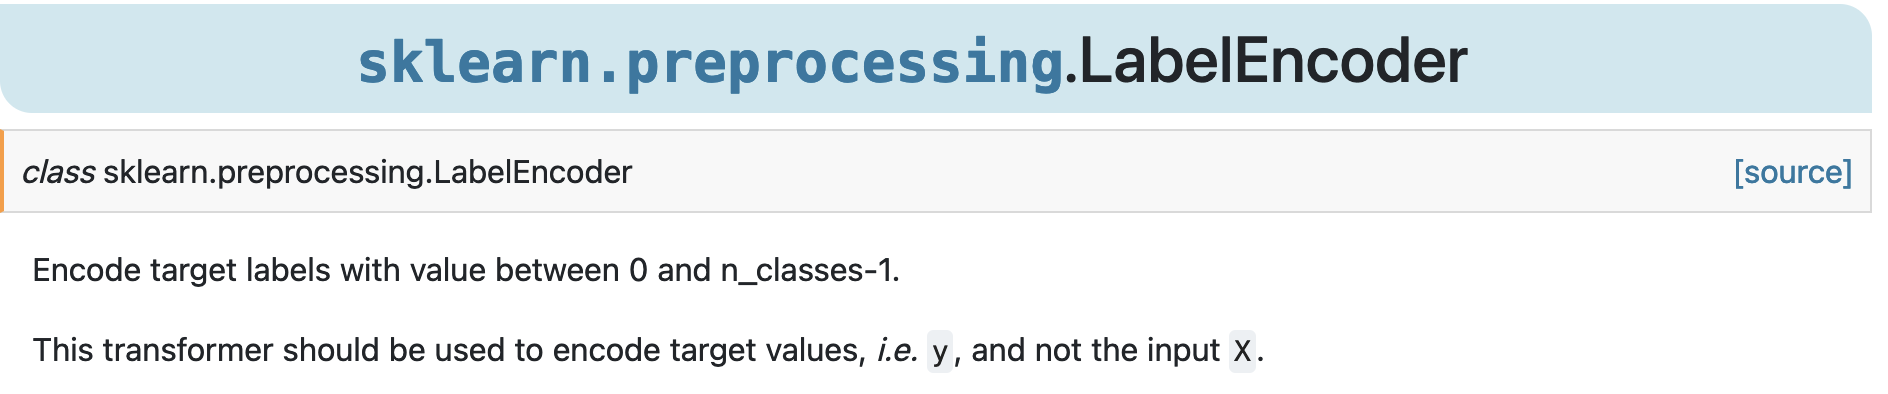

LabelEncoder Ref: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html

In [40]:
SS = StandardScaler()
Xs_train = SS.fit_transform(Xcv_train)
Xs_test = SS.transform(Xcv_test)

LE = LabelEncoder()
y_train_encoded  = LE.fit_transform(y_train)
y_train_category = np_utils.to_categorical(y_train_encoded)

y_test_encoded  = LE.transform(y_test)
y_test_category = np_utils.to_categorical(y_test_encoded)

In [41]:
human['class'].value_counts().shape[0]

7

# |||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
# Feed-Forward Neural Networks (FNNs) Model
# |||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||


FNNs Ref: 

In [87]:
model = Sequential()


model.add(Dense(7, input_dim=(Xcv_train.shape[1]), activation='relu')) #input
model.add(Dense(7*8*8*2, activation='relu')) #input
model.add(Dense(7*8*4, activation='relu', activity_regularizer=l2(0.002))) #input
model.add(Dropout(0.03))
model.add(Dense(7*12*2, activation='relu', activity_regularizer=l2(0.002))) #input
model.add(Dense(7*12*2, activation='relu', activity_regularizer=l2(0.002))) #input
# model.add(Dense(52*12, activation='relu', activity_regularizer=l2(0.002))) #input
# model.add(Dropout(0.03))
# model.add(Dense(52*8*2, activation='relu', activity_regularizer=l2(0.002))) #input



model.add(Dense(human['class'].value_counts().shape[0], activation='softmax', kernel_initializer="normal")) #output

# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
early_stop = EarlyStopping(monitor='val_loss', min_delta=0, patience=40, verbose=2, mode='auto')


history = model.fit(Xs_train, y_train_category, validation_data = (Xs_test, y_test_category),
                   batch_size = 2**6,
                   epochs = 100,
                   verbose = 1,
                   callbacks=[early_stop]
                   ) 


Epoch 1/100
52/52 [==============================] - 1s 10ms/step - loss: 1.4531 - accuracy: 0.4950 - val_loss: 0.9263 - val_accuracy: 0.7370
Epoch 2/100
52/52 [==============================] - 0s 8ms/step - loss: 0.6630 - accuracy: 0.8155 - val_loss: 0.6254 - val_accuracy: 0.8329
Epoch 3/100
52/52 [==============================] - 0s 8ms/step - loss: 0.4062 - accuracy: 0.9145 - val_loss: 0.5120 - val_accuracy: 0.8731
Epoch 4/100
52/52 [==============================] - 0s 9ms/step - loss: 0.2962 - accuracy: 0.9473 - val_loss: 0.4489 - val_accuracy: 0.8986
Epoch 5/100
52/52 [==============================] - 0s 9ms/step - loss: 0.2172 - accuracy: 0.9680 - val_loss: 0.4975 - val_accuracy: 0.8941
Epoch 6/100
52/52 [==============================] - 0s 9ms/step - loss: 0.2047 - accuracy: 0.9711 - val_loss: 0.4371 - val_accuracy: 0.8950
Epoch 7/100
52/52 [==============================] - 0s 8ms/step - loss: 0.1658 - accuracy: 0.9760 - val_loss: 0.4230 - val_accuracy: 0.8977
Epoch 8/100


In [88]:
score_test = history.model.evaluate(Xs_test,y_test_category, verbose=0)
print('Test set Score [Loss, Accuracy]=',score_test)
score_train = history.model.evaluate(Xs_train, y_train_category, verbose=0)
print('Train Set Score [Loss, Accuracy]=',score_train)

Test set Score [Loss, Accuracy]= [0.5291664600372314, 0.8858447670936584]
Train Set Score [Loss, Accuracy]= [0.08010386675596237, 0.9847792983055115]


In [89]:
# Check out our train loss and test loss over epochs.
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(10,4))
plt.suptitle('Convolutional Neural Networks: Scores', fontsize = 18)

# color = 'tab:red'
axes[0].set_xlabel('Epochs',  fontsize = 12)
axes[0].set_ylabel('Accuracy Metric', fontsize = 12)
axes[0].plot(accuracy ,  label='Training set: '+str(np.round(score_train[1]*100,1))+'%', color='#185fad')
axes[0].plot(val_accuracy , label='Testing set:  '+str(np.round(score_test[1]*100,1))+'%', color='orange')


axes[1].set_xlabel('Epochs', fontsize = 12)
axes[1].set_ylabel('Loss Metric', fontsize = 12)
axes[1].plot(loss , label='Training set: '+str(np.round(score_train[0],2)), color='red')
axes[1].plot(val_loss ,  label='Testing set:  '+str(np.round(score_test[0],2)), color='black')


axes[0].legend(fontsize = 12)
axes[1].legend(fontsize = 12)
fig.tight_layout()
plt.show()

In [92]:
# plot confusion matrix and model metrics summary ==============
import itertools

def plot_confusion_matrix_multiTargets(cm,
                                       class_y
                                       ):
    target_name = 'Human Gene Family '
                
#     """
#     This function prints and plots the confusion matrix.
#     Normalization can be applied by setting `normalize=True`.
#     """
#     cmap=plt.cm.Blues
    
    sorted_class_y = sorted(list(y_test.value_counts().index))

    

    plt.figure(figsize=(5,5))
    plt.title('Confusion Matrix:'+ target_name+'\nFNNs Model [4mers]',  fontsize = 14)

    plt.imshow(cm, interpolation='nearest', cmap='coolwarm')
    # plt.title(title, fontsize = 20)
    cbar = plt.colorbar(fraction=0.046, pad=0.04)
    cbar.ax.tick_params(labelsize=12) 
    tick_marks = np.arange(len(sorted_class_y))
    plt.xticks(tick_marks, sorted_class_y, rotation=45, fontsize = 12)
    plt.yticks(tick_marks, sorted_class_y, fontsize = 12)
    cm = cm*100
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if len(sorted_class_y) > 15:
            if i == j:
                plt.text(j, i, format(cm[i, j], '.1f')+'%',
                         horizontalalignment="center",
                         color="white" if i!=j  else "black",
                         weight='normal' if i==j else 'normal',
                        fontsize = 12)
        else:
            plt.text(j, i, format(cm[i, j], '.1f')+'%',
                     horizontalalignment="center",
                     color="white" if i!=j  else "black",
                     weight='normal' if i==j else 'normal',
                    fontsize = 12)

    plt.ylabel(f'True {target_name} Value', fontsize = 12)
    plt.xlabel(f'Predicted {target_name} Value', fontsize = 12)
    plt.tight_layout()   
    print('')
    print ('Confusion Matrix')
    print (pd.DataFrame( confusion_matrix(Y_true, Y_pred_classes) ))
    print('')

In [91]:
y_pred = model.predict(Xs_test)

Y_pred_classes = np.argmax(y_pred,axis = 1) 
Y_true = np.argmax(y_test_category,axis = 1)
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes, normalize='true') 

# print ( np.argmax(y_pred, axis=1),np.shape(np.argmax(y_pred, axis=1)) )

plot_confusion_matrix_multiTargets(  confusion_mtx,
                                   Y_pred_classes
                                       )


Confusion Matrix
     0    1   2    3    4   5    6
0  116    5   0    4    2   0    6
1    3  113   0    8    2   1    6
2    4    0  77    3    0   1    2
3    2    1   0  154    2   3    6
4    6    1   1    8  148   3   11
5    5    0   0    6    3  45    1
6    0    0   2   11    6   0  317

